In [18]:
# |default_exp app

# Notebook for uploading our model

In [2]:
!pip install gradio

## Brain or Computer

In [19]:
#|export
from fastai.vision.all import *
import gradio as gr

In [20]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

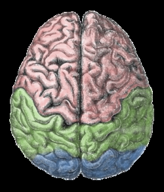

In [21]:
im = PILImage.create('brain.jpg')
im.thumbnail((192,192))
im

In [22]:
#|export 
learn = load_learner('brain_ai_model.pkl')

In [23]:
%time learn.predict(im)

CPU times: total: 266 ms
Wall time: 192 ms


('human_brain', TensorBase(0), TensorBase([1.0000e+00, 3.3739e-06]))

In [24]:
#|export 
categories = ('Brain', 'Computer')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))
   

In [25]:
classify_image(im)

{'Brain': 0.9999966621398926, 'Computer': 3.373942263351637e-06}

In [26]:
#|export 
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['brain.jpg', 'computer.jpg', 'dunno.jpg']

interface = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
interface.launch(inline=False)

C:\Users\james\anaconda3\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\james\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\james\anaconda3\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\james\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x1b1dc8f9550>, 'http://127.0.0.1:7861/', None)

In [27]:
m = learn.model

In [28]:
ps = list(m.parameters())

In [29]:
ps[1]

Parameter containing:
tensor([ 2.3467e-01,  2.6630e-01, -5.1096e-08,  5.1855e-01,  3.4404e-09,
         2.2251e-01,  4.2295e-01,  1.3153e-07,  2.5095e-01,  1.5152e-06,
         3.1680e-01,  2.5050e-01,  3.7865e-01,  1.0862e-05,  2.7528e-01,
         2.3669e-01,  2.4206e-01,  3.9539e-01,  4.6945e-01,  2.9084e-01,
         2.7268e-01,  2.7819e-01,  2.9064e-01,  2.0686e-01,  2.5895e-01,
         2.7869e-01,  2.9131e-01,  3.1587e-01,  3.8875e-01,  3.0401e-01,
         2.6763e-01,  2.1080e-01,  2.8705e-01,  3.3241e-01,  4.2679e-01,
         3.7320e-01,  7.4804e-08,  1.9078e-01,  1.4740e-08,  2.2310e-01,
         1.7923e-01,  2.4859e-01,  2.7395e-01,  2.5938e-01,  2.9414e-01,
         2.9924e-01,  2.2366e-01,  2.6288e-01,  2.2001e-08,  2.6588e-01,
         2.2091e-01,  2.8414e-01,  3.3078e-01,  2.2676e-01,  3.6544e-01,
         2.1245e-01,  2.3981e-01,  2.4964e-01,  5.2582e-01,  2.4822e-01,
         2.9562e-01,  2.5868e-01,  4.8340e-01,  2.6684e-01],
       requires_grad=True)

## Export to python file

In [30]:
from nbdev.export import nb_export

nb_export('brain_computer_app.ipynb')

In [31]:
??nb_export